## Punto 1: Dados

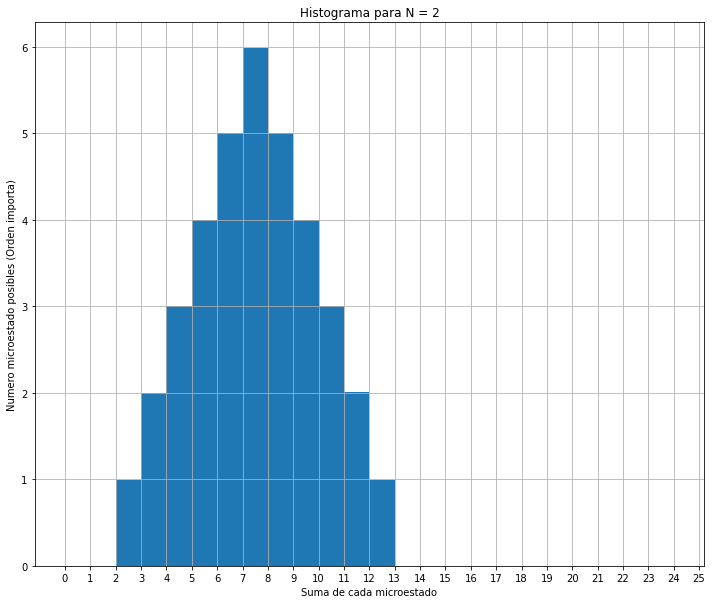

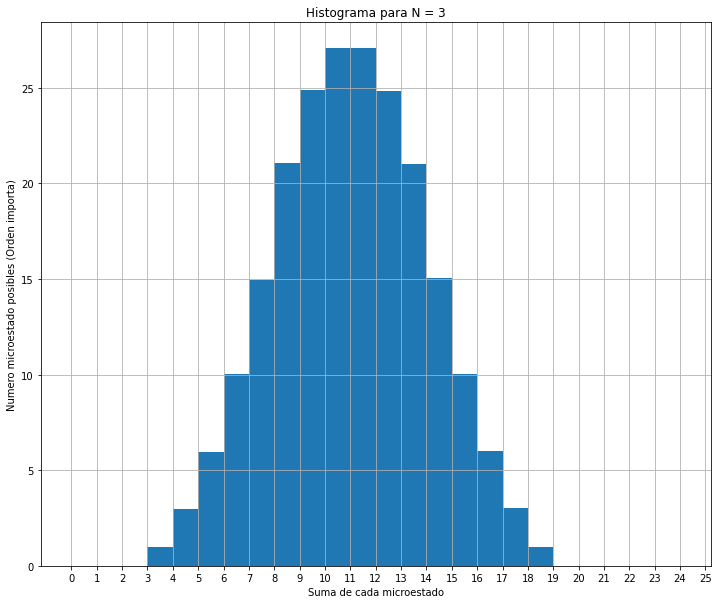

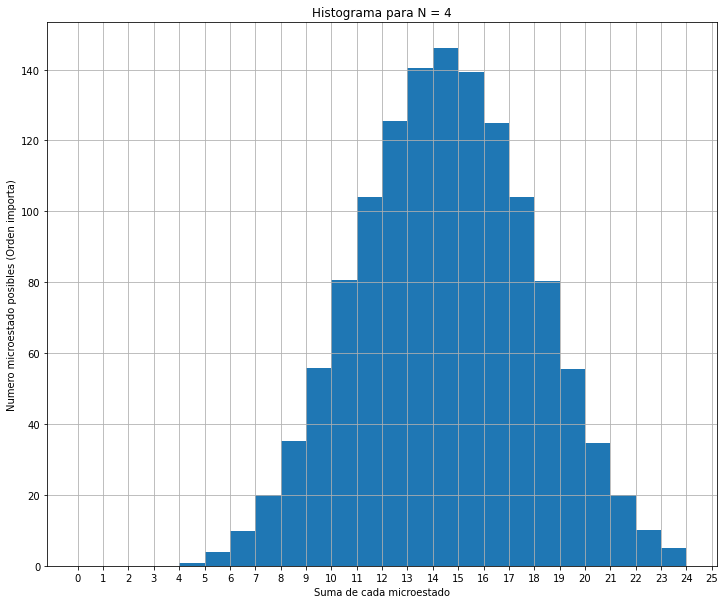

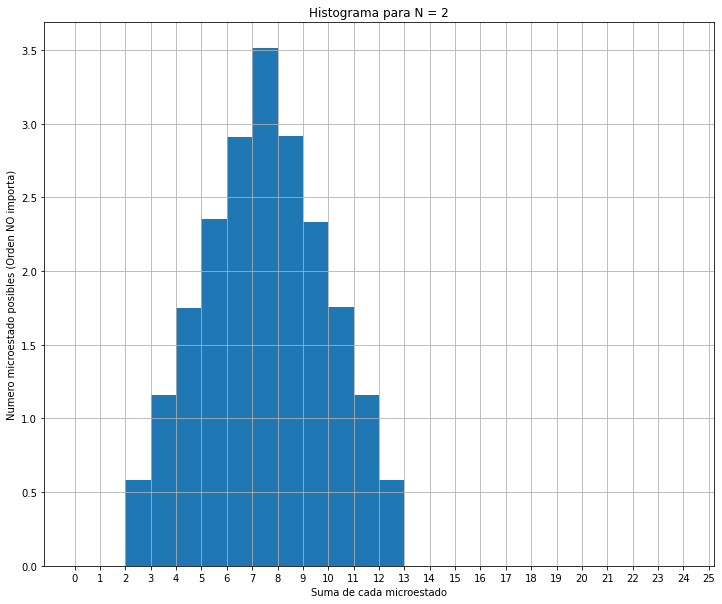

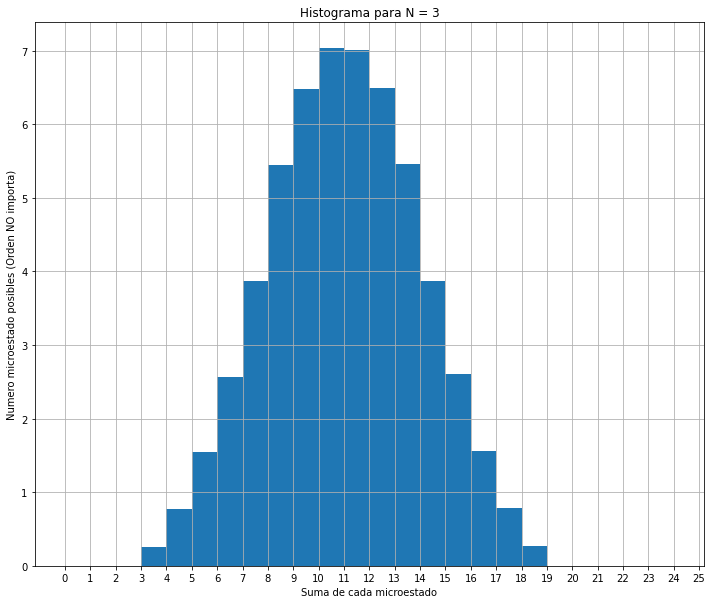

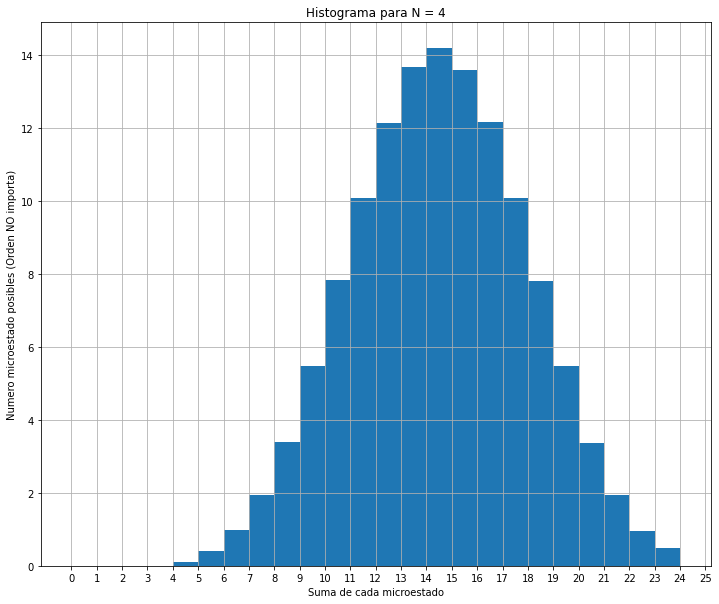

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
"""
Hay diferencia si consideramos orden o no. Pero se puede expresar en la escala
de los histogramas:
"""
dim = np.array([2,3,4])
n = int(1e6)
# Para permutaciones
for i in dim:
    plt.figure(figsize=(12,10))
    rand = np.random.randint(1, 7,(n,i))
    sum = np.sum(rand, axis = 1)
    plt.hist(sum, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                        10, 11, 12, 13, 14, 15, 16, 17, 18,
                        19, 20, 21, 22, 23, 24], weights=np.ones_like(sum)*(6**i)/n)
    title = "Histograma para N = " + str(i)
    plt.xlabel("Suma de cada microestado")
    plt.grid()
    plt.ylabel("Numero microestado posibles (Orden importa)")
    plt.title(title)
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                        10, 11, 12, 13, 14, 15, 16, 17, 18,
                        19, 20, 21, 22, 23, 24, 25])
    plt.show()
# Para combinaciones
for i in dim:
    plt.figure(figsize=(12,10))
    rand = np.random.randint(1, 7,(n,i))
    sum = np.sum(rand, axis = 1)
    fact = scipy.special.binom(i + 6 - 1, i)
    plt.hist(sum, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                        10, 11, 12, 13, 14, 15, 16, 17, 18,
                        19, 20, 21, 22, 23, 24], weights=np.ones_like(sum)*fact/n)
    title = "Histograma para N = " + str(i)
    plt.xlabel("Suma de cada microestado")
    plt.grid()
    plt.ylabel("Numero microestado posibles (Orden NO importa)")
    plt.title(title)
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                        10, 11, 12, 13, 14, 15, 16, 17, 18,
                        19, 20, 21, 22, 23, 24, 25])
    plt.show()

## Punto 2: Colisionador circular

In [ ]:
Rp = 0.1
Rac = 1
n = 100

rs1,rs2 = np.random.uniform(0,Rac-Rp,(2,n))
th1,th2 = np.random.uniform(0, 2*np.pi, (2,n))

#cond1 = (rs1 == rs2) & (th1 == th2)
dist = np.sqrt(rs1**2 + rs2**2 - 2*rs1*rs2*np.cos(th2-th1))
cond2 = dist<Rp

x1 = rs1[cond2]*np.cos(th1[cond2])
x2 = rs2[cond2]*np.cos(th2[cond2])
y1 = rs1[cond2]*np.sin(th1[cond2])
y2 = rs2[cond2]*np.sin(th2[cond2])

#print(cond2, np.sum(cond2))

fig, ax = plt.subplots()

for i in range(len(x1)):
    circles1 = plt.Circle( (x1[i],y1[i]), Rp, fill = False)
    circles2 = plt.Circle( (x2[i],y2[i]), Rp, fill = False)
    ax.add_patch(circles1)
    ax.add_patch(circles2)


plt.show()

n = range(8)
prop = np.array([])
for i in n:
    cont = 10**(i)
    rs1,rs2 = np.random.uniform(0,Rac-Rp,(2,cont))
    th1,th2 = np.random.uniform(0, 2*np.pi, (2,cont))
    dist = np.sqrt(rs1**2 + rs2**2 - 2*rs1*rs2*np.cos(th2-th1))
    cond2 = dist<Rp
    prop = np.append(prop, cond2.sum()/cont)

plt.figure()
plt.plot(n, prop)
plt.show()

## Punto 3: Kernel


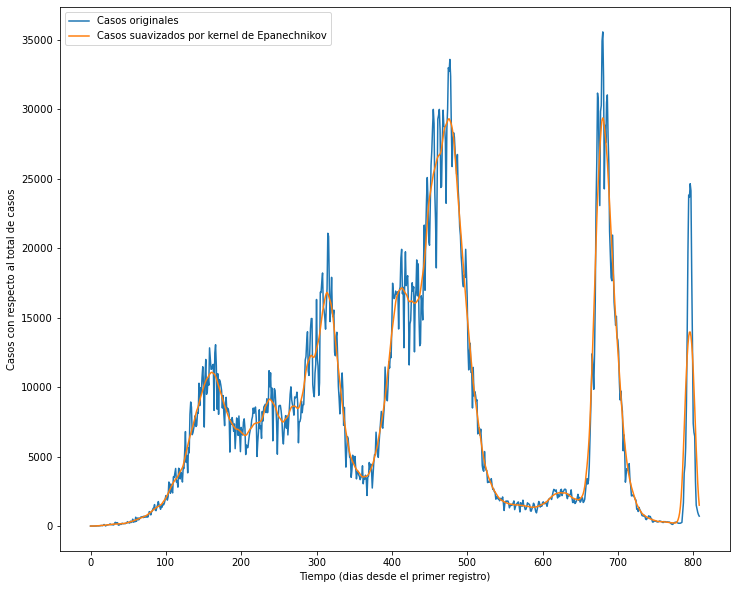

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leyendo los datos
df = pd.read_csv("Colombia_COVID19_Coronavirus_casos_diarios.csv")
df = df["NUEVOS_CASOS"]
# Pasando a un arreglo de numpy
ncases = df.to_numpy()
# Arreglo del tiempo (Funciona porque todos los puntos tienen diff de 1 dia)
n = np.array(range(len(ncases)))
# Normalizando con respecto al maximo
casesnorm = ncases/ np.sum(ncases)

# Inicializando el nuevo arreglo procesado
smoothcases = np.array([])
# Definiendo el nuevo kernel
def Epanechnikov(x, mu, h):
    if np.abs((x-mu)/h) <= 1:
        return 3/4 * (1 - ((x-mu)/h)**2 )
    else: 
        return 0 
# Dando un h
h = 10
# Generando el filtrado
for i in n:
    Epatemp = np.array([])
    for k in n:
        Epatemp = np.append(Epatemp, Epanechnikov(k, i, h))
    convtemp = Epatemp * casesnorm
    valtemp = np.sum(convtemp)
    smoothcases = np.append(smoothcases, valtemp)
# Normalizando nuevamente
smoothcases = smoothcases/np.sum(smoothcases)
plt.figure(figsize=(12,10))
plt.plot(n, np.sum(ncases)*casesnorm, label="Casos originales")
plt.plot(n, np.sum(ncases)*smoothcases, label ="Casos suavizados por kernel de Epanechnikov")
plt.xlabel("Tiempo (dias desde el primer registro)")
plt.ylabel("Casos con respecto al total de casos")
plt.legend()
plt.show()